In [1]:
import pandas as pd
import numpy as np
import re
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, GRU, SimpleRNN, Bidirectional, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam

In [2]:
Data_path='IMDB Dataset.csv'
df = pd.read_csv(Data_path)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

Text(0.5, 1.0, 'Sentiment Field Distribution\n25000\n25000')

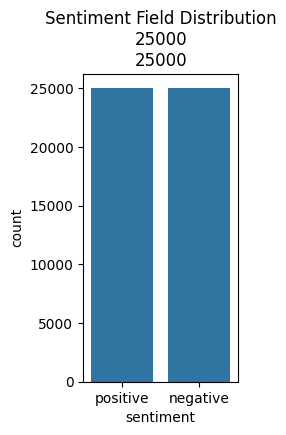

In [5]:
val_count=df["sentiment"].value_counts()
plt.figure(figsize= (2,4))
sns.countplot(data = df, x= 'sentiment')
plt.title(f'Sentiment Field Distribution\n{val_count.to_string(index=False, header=None)}')

## Mapping positive->1, Negative->0

In [6]:
df.loc[df["sentiment"] == 'positive', "sentiment"] = 1
df.loc[df["sentiment"] == 'negative', "sentiment"] = 0

In [7]:
df['sentiment'].unique()

array([1, 0], dtype=object)

## Regular Expression to clean text by removing urls, emojis, html tags and punctuations.

In [8]:
stop_words = set(stopwords.words('english'))
def clean_text(sentence):
    # Removing URLS
    sentence = re.sub(r"https?://\S+|www\.\S+"," ",sentence)
    
    # Removing html tags
    sentence = re.sub(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});"," ",sentence)
    
    # Removing the Punctuation
    sentence = re.sub(r"[^\w\s]", " ", sentence)
        
    # Removing words that have numbers 
    sentence = re.sub(r"\w*\d\w*", " ", sentence)
        
    # Removing Digits 
    sentence = re.sub(r"[0-9]+", " ", sentence)
        
    # Cleaning white spaces
    sentence = re.sub(r"\s+", " ", sentence).strip()
        
    sentence = sentence.lower()
    # Check stop words
    tokens = []
    for token in sentence.split():
        if token not in stop_words:
            tokens.append(token)
    return " ".join(tokens)

In [9]:
df.loc[:, 'review'] = df['review'].apply(clean_text)

In [10]:
df.head()

,review,sentiment
0,one reviewers mentioned watching oz episode ho...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake thinks zombie...,0
4,petter mattei love time money visually stunnin...,1


In [11]:
df['review'][1]

'wonderful little production filming technique unassuming old time bbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great master comedy life realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwell murals decorating every surface terribly well done'

In [12]:
X = df['review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

print("Train Data size:", len(X_train), len(y_train))
print("Test Data size", len(X_test), len(y_test))

Train Data size: 40000 40000
Test Data size 10000 10000


In [13]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convert text to sequences of integers
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

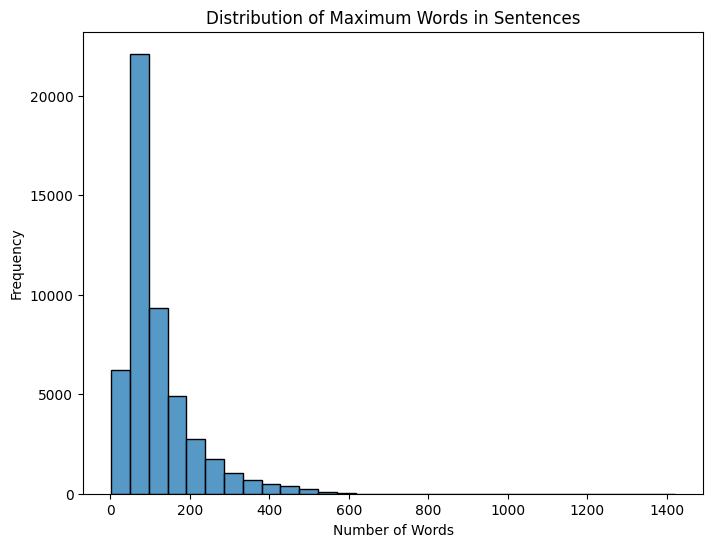

In [14]:
max_words = df['review'].apply(lambda x: len(x.split()))

# Plotting the distribution of the maximum number of words in sentences
plt.figure(figsize=(8, 6))
sns.histplot(max_words, bins=30)
plt.title('Distribution of Maximum Words in Sentences')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

#### Hyperparameters 

In [15]:
max_len = 200  # Maximum words in each sequence.
batch_size=512

#### Padding

In [16]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [17]:
vocabulary_size = len(tokenizer.word_index)
vocabulary_size

91086

# LSTM

In [23]:
model = Sequential()
model.add(Embedding(input_dim=vocabulary_size, output_dim=128))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [24]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

y_train = y_train.astype('int32')
y_test = y_test.astype('int32')

In [25]:
history=model.fit(X_train, y_train, epochs=5,validation_data=(X_test, y_test),batch_size=batch_size)

Epoch 1/5
79/79 [==============================] - 768s 10s/step - loss: 0.6925 - accuracy: 0.5317 - val_loss: 0.6906 - val_accuracy: 0.6276
Epoch 2/5
79/79 [==============================] - 798s 10s/step - loss: 0.6259 - accuracy: 0.6979 - val_loss: 0.4770 - val_accuracy: 0.7928
Epoch 3/5
79/79 [==============================] - 830s 11s/step - loss: 0.3720 - accuracy: 0.8622 - val_loss: 0.3193 - val_accuracy: 0.8797
Epoch 4/5
79/79 [==============================] - 843s 11s/step - loss: 0.2462 - accuracy: 0.9133 - val_loss: 0.2874 - val_accuracy: 0.8814
Epoch 5/5
79/79 [==============================] - 856s 11s/step - loss: 0.1862 - accuracy: 0.9355 - val_loss: 0.2775 - val_accuracy: 0.8878


In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 128)         11659008  
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 11807233 (45.04 MB)
Trainable params: 11

313/313 [==============================] - 35s 111ms/step


Text(95.72222222222221, 0.5, 'Truth')

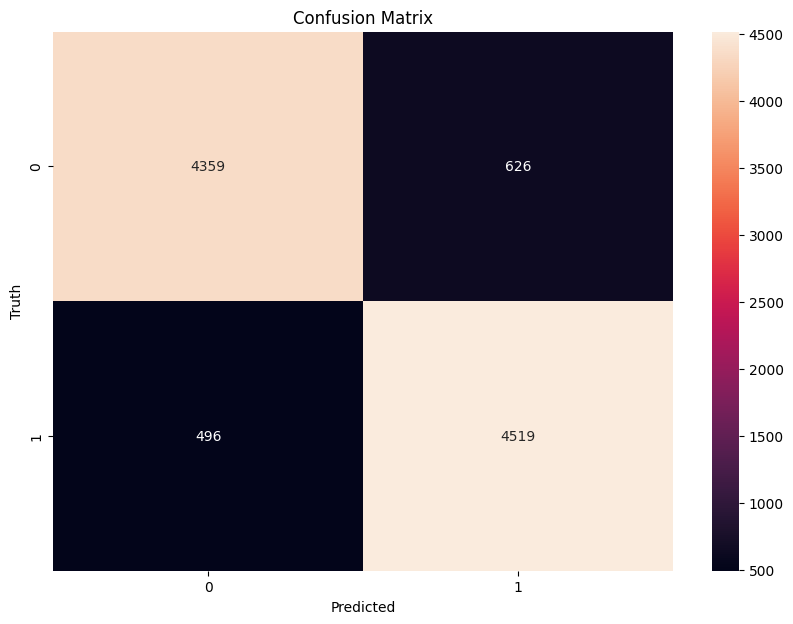

In [27]:
y_pred = model.predict(X_test)
y_pred_rounded = np.round(y_pred)
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_rounded)


plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [28]:
print("Classification Report: \n", classification_report(y_test, y_pred_rounded))

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.87      0.89      4985
           1       0.88      0.90      0.89      5015

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



# GRU

In [21]:
model_gru = Sequential()
model_gru.add(Embedding(input_dim=vocabulary_size, output_dim=128))
model_gru.add(GRU(units=128, dropout=0.2, recurrent_dropout=0.2))
model_gru.add(Dropout(0.5))
model_gru.add(Dense(128, activation='relu'))
model_gru.add(Dropout(0.5))
model_gru.add(Dense(1, activation='sigmoid'))

model_gru.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])


Epoch 1/5
79/79 [==============================] - 552s 7s/step - loss: 0.6922 - accuracy: 0.5246 - val_loss: 0.6906 - val_accuracy: 0.5897
Epoch 2/5
79/79 [==============================] - 678s 9s/step - loss: 0.6865 - accuracy: 0.5935 - val_loss: 0.6746 - val_accuracy: 0.6661
Epoch 3/5
79/79 [==============================] - 728s 9s/step - loss: 0.5367 - accuracy: 0.7682 - val_loss: 0.3481 - val_accuracy: 0.8535
Epoch 4/5
79/79 [==============================] - 729s 9s/step - loss: 0.2763 - accuracy: 0.8912 - val_loss: 0.2787 - val_accuracy: 0.8853
Epoch 5/5
79/79 [==============================] - 731s 9s/step - loss: 0.1996 - accuracy: 0.9273 - val_loss: 0.2683 - val_accuracy: 0.8927
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         11659008  
                                                                 
 lstm (LSTM)    

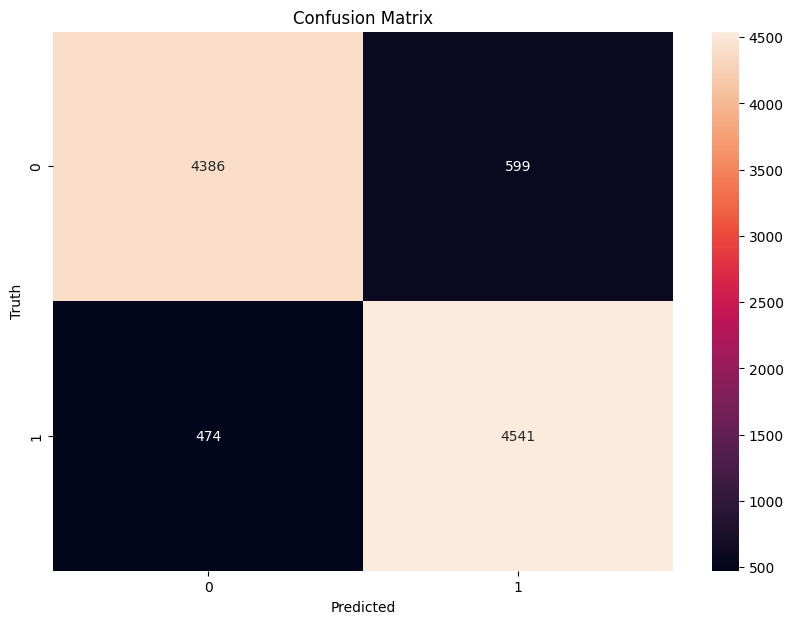

In [22]:
history=model_gru.fit(X_train, y_train, epochs=5,validation_data=(X_test, y_test),batch_size=batch_size)

model.summary()

y_pred = model_gru.predict(X_test)
y_pred_rounded = np.round(y_pred)
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_rounded)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

print("Classification Report: \n", classification_report(y_test, y_pred_rounded))

# birnn

In [29]:
model_birnn = Sequential()
model_birnn.add(Embedding(input_dim=vocabulary_size, output_dim=128))
model_birnn.add(Bidirectional(SimpleRNN(units=128, dropout=0.2, recurrent_dropout=0.2)))
model_birnn.add(Dropout(0.5))
model_birnn.add(Dense(128, activation='relu'))
model_birnn.add(Dropout(0.5))
model_birnn.add(Dense(1, activation='sigmoid'))

model_birnn.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])


Epoch 1/5
79/79 [==============================] - 313s 4s/step - loss: 0.7465 - accuracy: 0.5020 - val_loss: 0.6951 - val_accuracy: 0.5012
Epoch 2/5
79/79 [==============================] - 304s 4s/step - loss: 0.7363 - accuracy: 0.4997 - val_loss: 0.6940 - val_accuracy: 0.4982
Epoch 3/5
79/79 [==============================] - 307s 4s/step - loss: 0.7328 - accuracy: 0.4967 - val_loss: 0.6939 - val_accuracy: 0.4965
Epoch 4/5
79/79 [==============================] - 304s 4s/step - loss: 0.7249 - accuracy: 0.5010 - val_loss: 0.6936 - val_accuracy: 0.4980
Epoch 5/5
79/79 [==============================] - 302s 4s/step - loss: 0.7247 - accuracy: 0.5010 - val_loss: 0.6934 - val_accuracy: 0.5002
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 128)         11659008  
                                                                 
 bidirectional

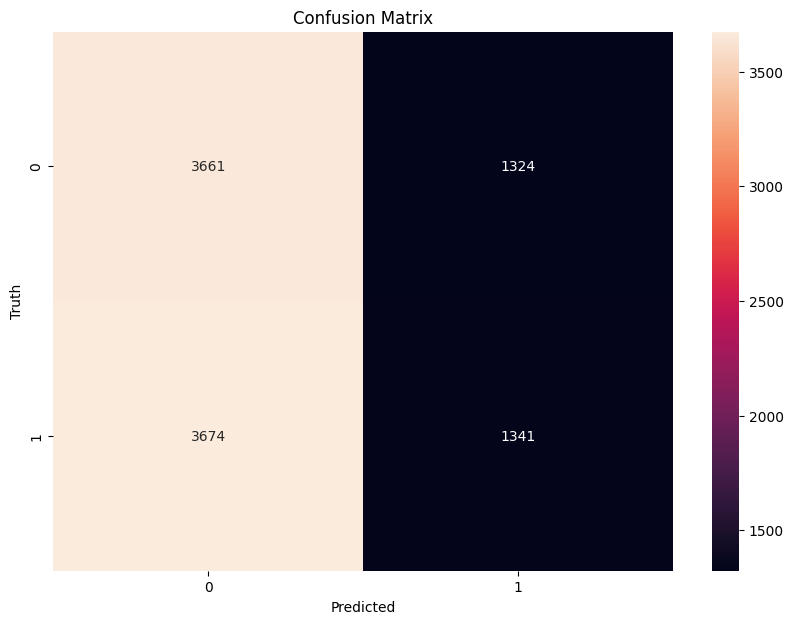

In [30]:
history=model_birnn.fit(X_train, y_train, epochs=5,validation_data=(X_test, y_test),batch_size=batch_size)

model_birnn.summary()

y_pred = model_birnn.predict(X_test)
y_pred_rounded = np.round(y_pred)
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_rounded)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

print("Classification Report: \n", classification_report(y_test, y_pred_rounded))

# rnn

In [31]:
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=vocabulary_size, output_dim=128))
model_rnn.add(SimpleRNN(units=128, dropout=0.2, recurrent_dropout=0.2))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(128, activation='relu'))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(1, activation='sigmoid'))

model_rnn.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])


Epoch 1/5
79/79 [==============================] - 139s 2s/step - loss: 0.7368 - accuracy: 0.4985 - val_loss: 0.6933 - val_accuracy: 0.5081
Epoch 2/5
79/79 [==============================] - 137s 2s/step - loss: 0.7295 - accuracy: 0.4969 - val_loss: 0.6928 - val_accuracy: 0.5131
Epoch 3/5
79/79 [==============================] - 140s 2s/step - loss: 0.7238 - accuracy: 0.5007 - val_loss: 0.6926 - val_accuracy: 0.5127
Epoch 4/5
79/79 [==============================] - 140s 2s/step - loss: 0.7214 - accuracy: 0.5004 - val_loss: 0.6926 - val_accuracy: 0.5146
Epoch 5/5
79/79 [==============================] - 138s 2s/step - loss: 0.7174 - accuracy: 0.5037 - val_loss: 0.6924 - val_accuracy: 0.5134
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 128)         11659008  
                                                                 
 simple_rnn_1 

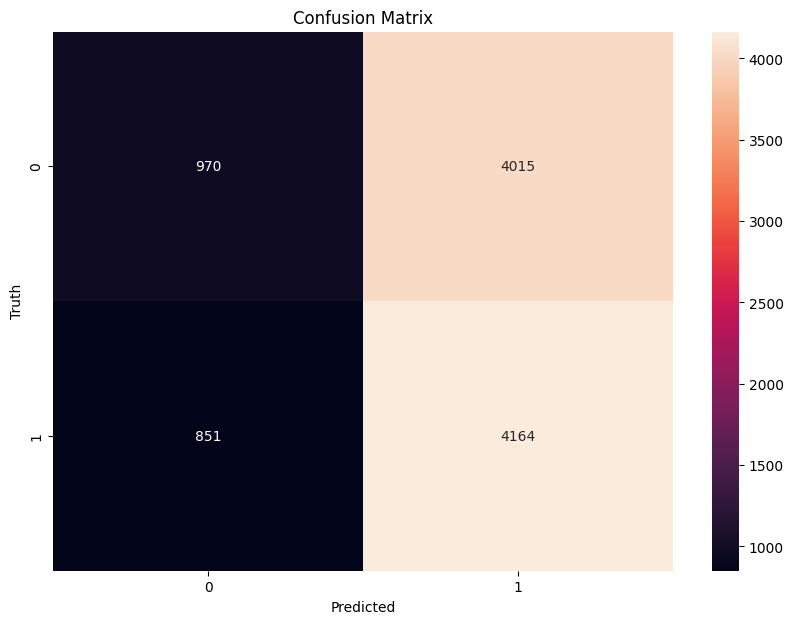

In [32]:
history=model_rnn.fit(X_train, y_train, epochs=5,validation_data=(X_test, y_test),batch_size=batch_size)

model_rnn.summary()

y_pred = model_rnn.predict(X_test)
y_pred_rounded = np.round(y_pred)
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_rounded)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

print("Classification Report: \n", classification_report(y_test, y_pred_rounded))

# CNN + LSTM Model

In [34]:
model_cnn_lstm = Sequential()
model_cnn_lstm.add(Embedding(input_dim=vocabulary_size, output_dim=128))
model_cnn_lstm.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model_cnn_lstm.add(MaxPooling1D(pool_size=2))
model_cnn_lstm.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model_cnn_lstm.add(Dropout(0.5))
model_cnn_lstm.add(Dense(1, activation='sigmoid'))

model_cnn_lstm.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])


Epoch 1/5
79/79 [==============================] - 185s 2s/step - loss: 0.6915 - accuracy: 0.5518 - val_loss: 0.6865 - val_accuracy: 0.7002
Epoch 2/5
79/79 [==============================] - 168s 2s/step - loss: 0.5502 - accuracy: 0.7614 - val_loss: 0.3936 - val_accuracy: 0.8438
Epoch 3/5
79/79 [==============================] - 165s 2s/step - loss: 0.2990 - accuracy: 0.8902 - val_loss: 0.3116 - val_accuracy: 0.8780
Epoch 4/5
79/79 [==============================] - 174s 2s/step - loss: 0.2082 - accuracy: 0.9273 - val_loss: 0.2901 - val_accuracy: 0.8825
Epoch 5/5
79/79 [==============================] - 174s 2s/step - loss: 0.1570 - accuracy: 0.9493 - val_loss: 0.3119 - val_accuracy: 0.8822
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 128)         11659008  
                                                                 
 conv1d_1 (Con

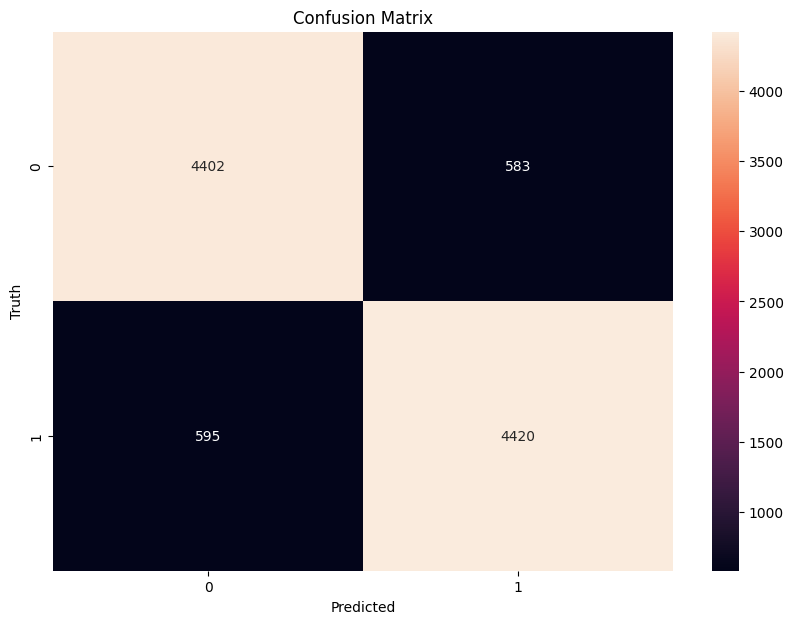

In [35]:
history=model_cnn_lstm.fit(X_train, y_train, epochs=5,validation_data=(X_test, y_test),batch_size=batch_size)

model_cnn_lstm.summary()

y_pred = model_cnn_lstm.predict(X_test)
y_pred_rounded = np.round(y_pred)
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_rounded)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

print("Classification Report: \n", classification_report(y_test, y_pred_rounded))

# fine tuning with bert

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import DataCollatorWithPadding
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Split the data into training and test sets
X = df['review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

print("Train Data size:", len(X_train), len(y_train))
print("Test Data size", len(X_test), len(y_test))

# Ensure that labels are in the correct format (e.g., integers)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Initialize the tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

# Tokenization function
def tokenize(batch):
    return tokenizer(batch['review'], padding=True, truncation=True, max_length=512)

# Prepare the dataset in a format that TensorFlow can use
train_data = pd.DataFrame({'review': X_train, 'sentiment': y_train})
test_data = pd.DataFrame({'review': X_test, 'sentiment': y_test})

# Tokenize the datasets
train_encodings = tokenizer(list(train_data['review']), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(list(test_data['review']), truncation=True, padding=True, max_length=512)

# Convert to TensorFlow dataset
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_data['sentiment'].values  # Ensure the labels are numpy arrays of integers
))

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    test_data['sentiment'].values  # Ensure the labels are numpy arrays of integers
))

# Batch the datasets
batch_size = 8
train_dataset = train_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

# Load the pre-trained BERT model with a classification head
model = TFAutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # Binary classification (positive/negative)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(train_dataset, validation_data=test_dataset, epochs=3)

# Evaluate the model on the test dataset
test_results = model.evaluate(test_dataset)
print(f'Test Loss: {test_results[0]}, Test Accuracy: {test_results[1]}')

# Make predictions on the test dataset
y_pred_logits = model.predict(test_dataset).logits
y_pred_rounded = tf.argmax(y_pred_logits, axis=1).numpy()  # Get the predicted class labels

# Generate the confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_rounded)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Print classification report
print("Classification Report: \n", classification_report(y_test, y_pred_rounded))


C:\Users\Lenovo\anaconda3\envs\FaceRecognition\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Train Data size: 40000 40000
Test Data size 10000 10000


C:\Users\Lenovo\anaconda3\envs\FaceRecognition\lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
  15/5000 [..............................] - ETA: 36:27:36 - loss: 0.6987 - accuracy: 0.5667